<a href="https://colab.research.google.com/github/marshaniswah/Tugas-AI-Big-Data/blob/main/Clustering_Pengunjung_Mall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

Pada tahap ini dimuat beberapa Library yang dibutuhkan. Mulai dari library untuk processing data, preprocessing data, evaluasi model hingga model clustering yaitu K-Means Algorithm

In [1]:
#Library untuk processing data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Library untuk Evaluasi Model
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

#Library untuk Model Clustering
from sklearn.cluster import KMeans


**Memuat Dataset**

Pada tahap ini dilakukan pemuatan data mulai dari pemuatan 5 data teratas, pendeskripsian data, jumlah baris dan kolom, dan informasi dataset.


In [2]:
link = 'https://raw.githubusercontent.com/marshaniswah/Tugas-AI-Big-Data/main/Clustering%20Pelanggan%20Mall/Mall_Customers.csv'
df = pd.read_csv(link)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape #menunjukan jumlah baris dan kolom dari dataset

(200, 5)

In [6]:
df.info() #mengecek info dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#karena pada informasi dataset kita terdapat data non-null maka kita perlu mengetahui data tersebut
df.isnull().sum()
#pada tahap ini kita ingin mengecek apakah dataset kita memiliki data null. Karena jika ada, hal tersebut dapat mempengaruhi proses clustering kedepannya.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

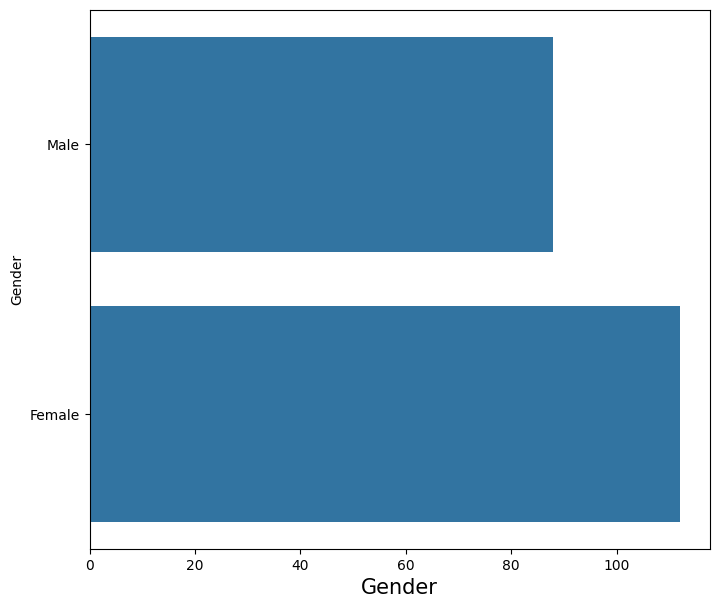

In [10]:
plt.figure(figsize=(8,7))
sns.countplot(df["Gender"])
plt.xlabel("Gender",fontsize = 15)
plt.show()

<ipython-input-11-3137560e6fc6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],color = "Blue")


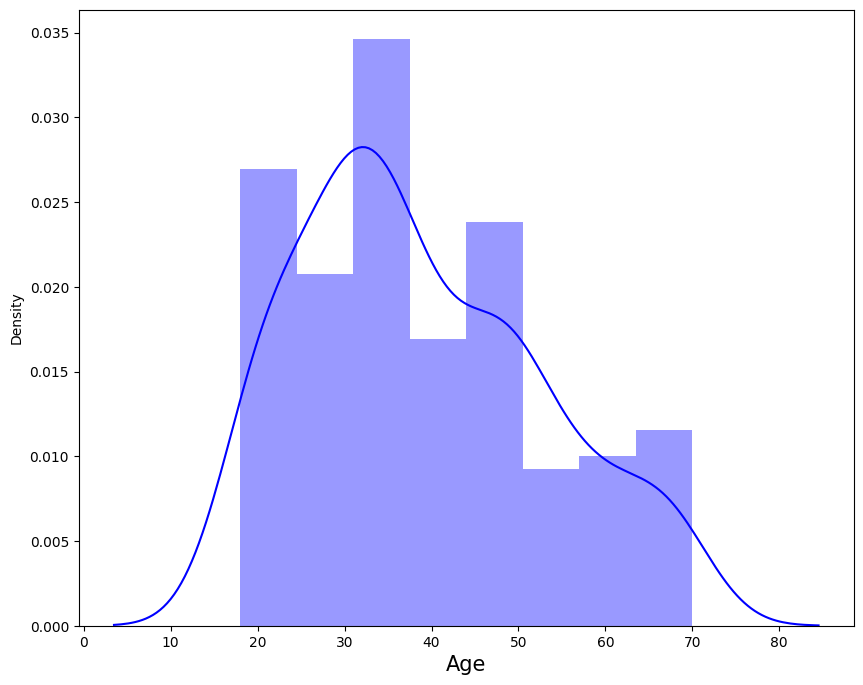

In [11]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"],color = "Blue")
plt.xlabel("Age",fontsize = 15)
plt.show()

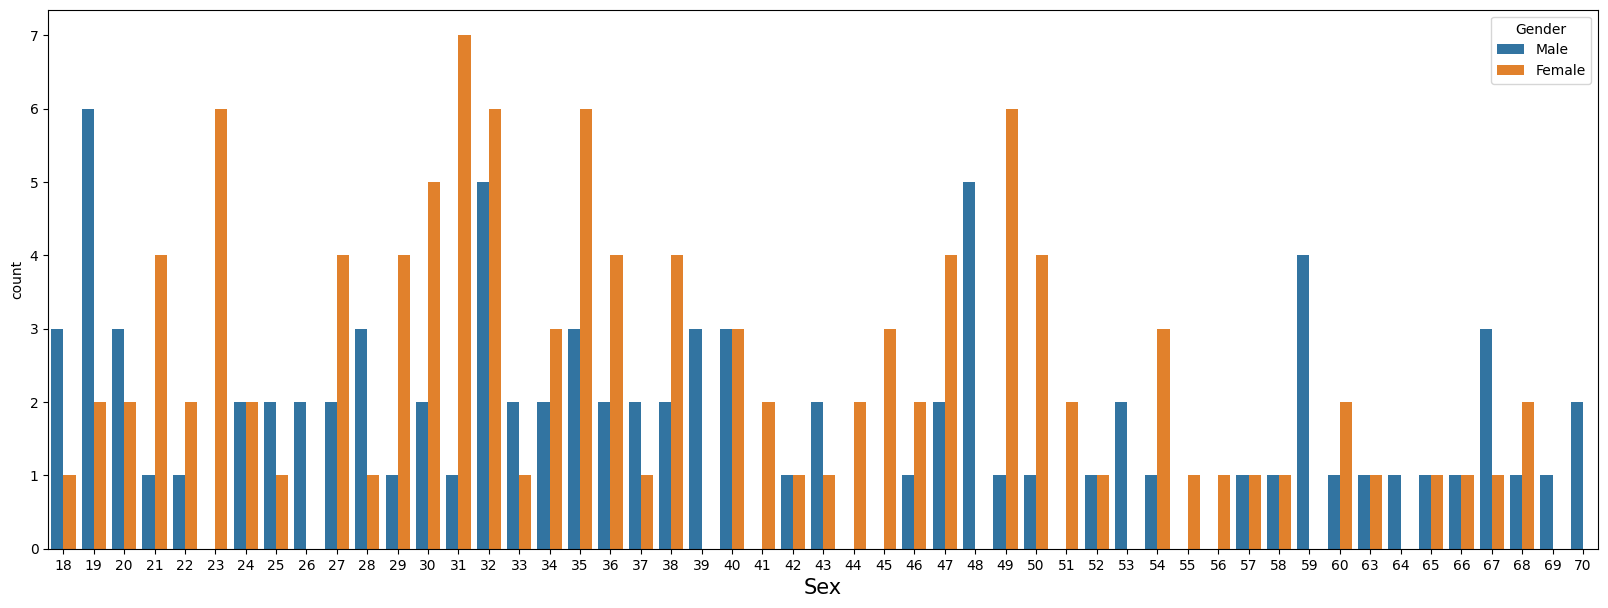

In [12]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [13]:
# drop the CustomerID Column not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-15-604a0b8d81ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color = "blue")
<ipython-input-15-604a0b8d81ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column],color = "blue")
<ipython-input-15-604a0b8d81ba>:7: UserWarning: 

`distplot` is a deprecated fun

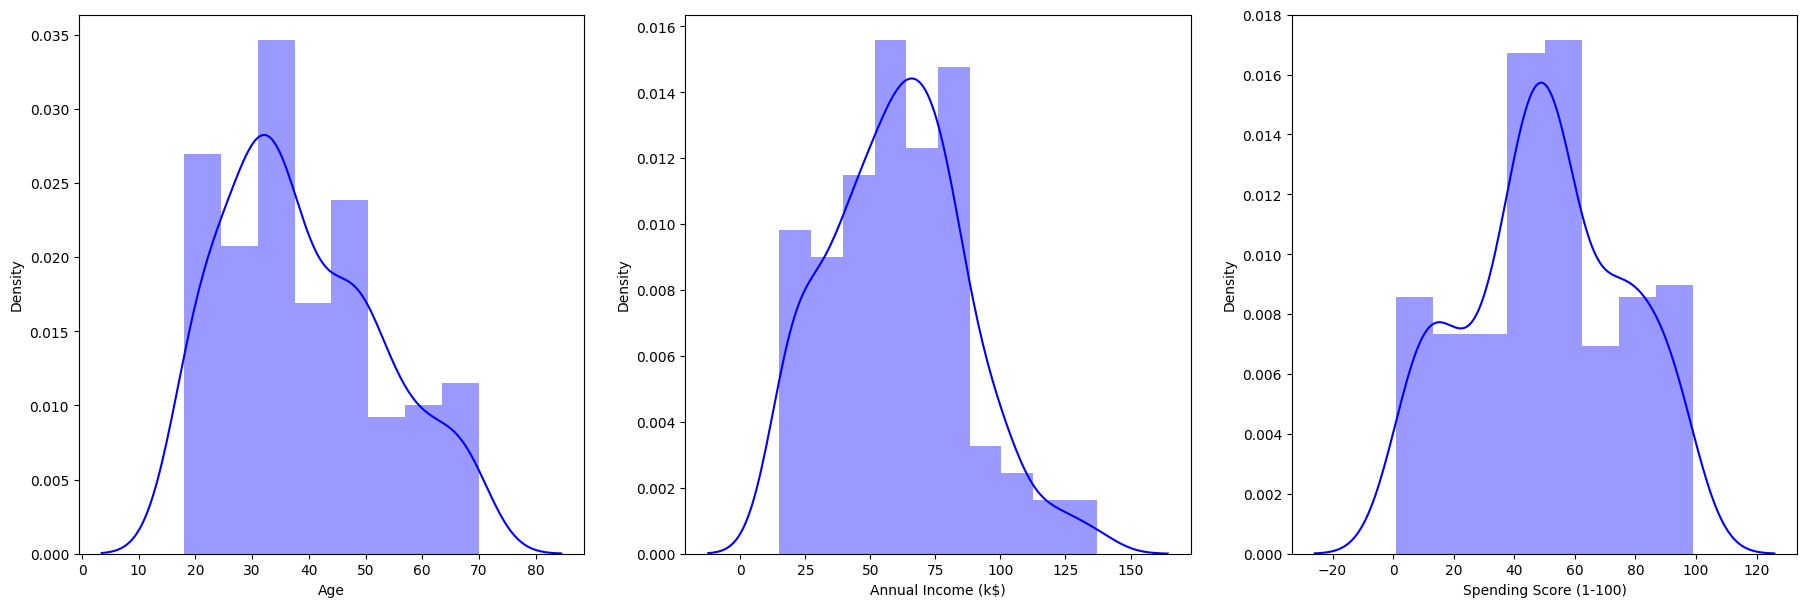

In [15]:
plt.figure(figsize=(30,7))
plotnumber = 1

for column in df.iloc[:,1:]:
  if plotnumber <= 8:
    ax = plt.subplot(1,4,plotnumber)
    sns.distplot(df[column],color = "blue")
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [16]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [17]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [18]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


**Data Preprocessing**

Sebelum mengimplementasikan Algoritma K-Means ke dalam dataset, dilakukan data preprocessing terlebih dahulu.

In [19]:
X = df.iloc[:,[2,3]].values

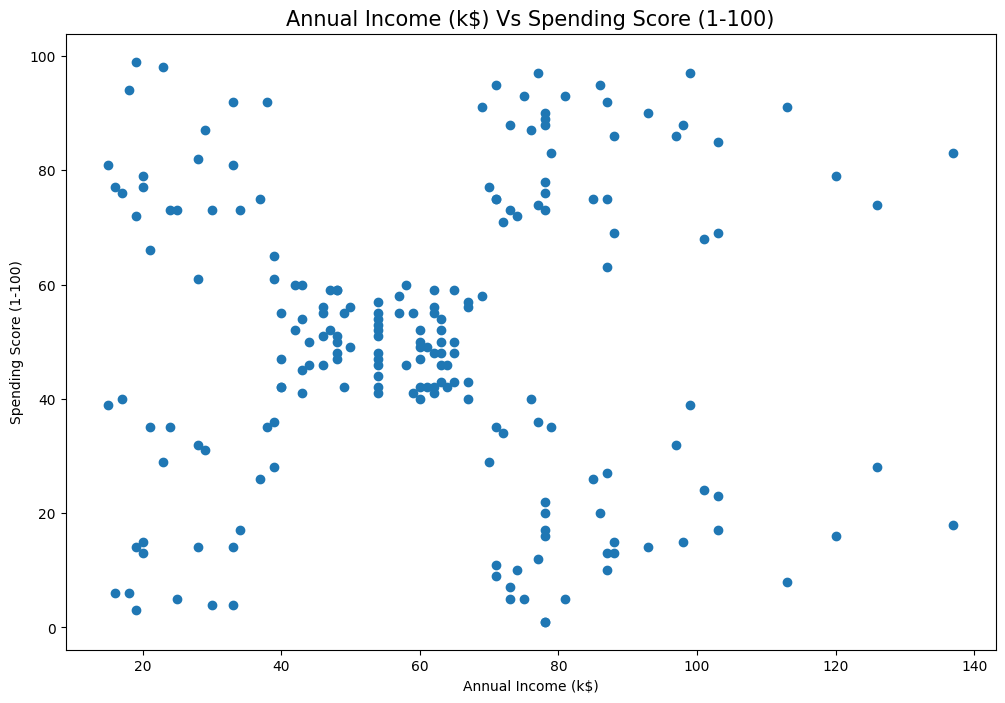

In [20]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) Vs Spending Score (1-100)",fontsize = 15)
plt.show()

**Data Processing**

Pada tahap ini dataset akan diproses menggunakan K-Means Algoritma untuk melihat bagaimana pengelompokan pelanggan berdasarkan Annual Income dan Spending Score

In [21]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_)

[[79.6        50.12727273]
 [37.28888889 50.28888889]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


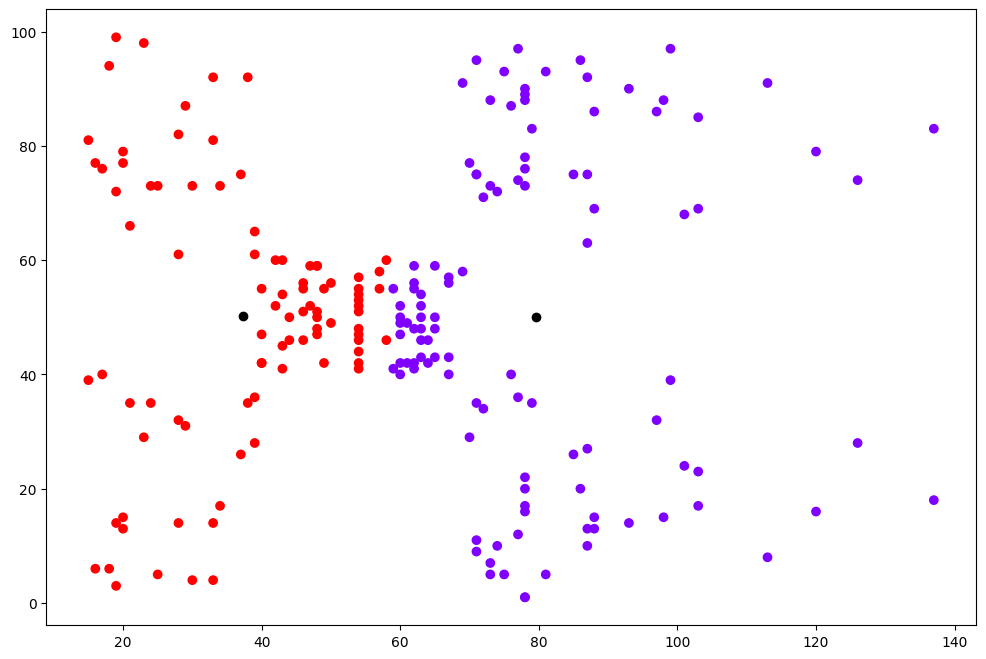

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


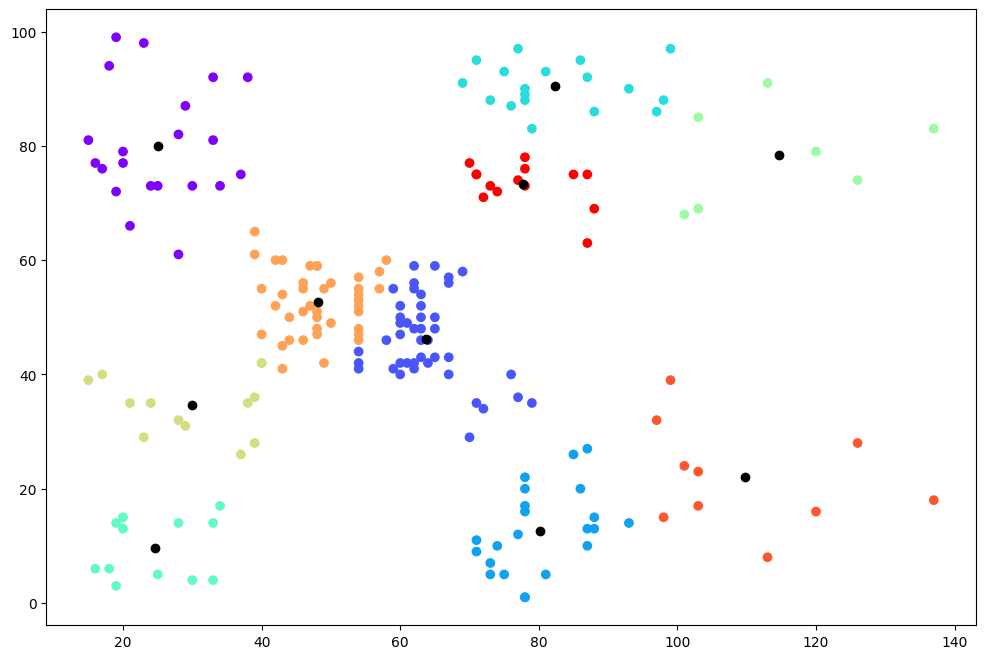

In [24]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

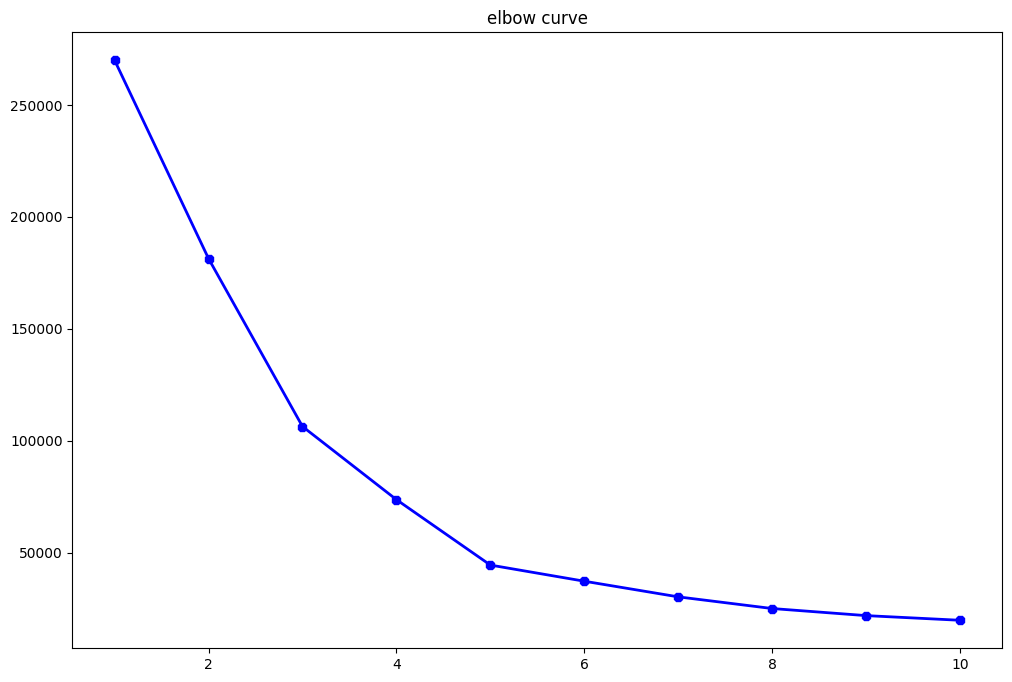

In [25]:
plt.figure(figsize=(12,8))

wcss=[] # distortion # within cluster sum of squares

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,linewidth=2, color="blue", marker ="8")
plt.title('elbow curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


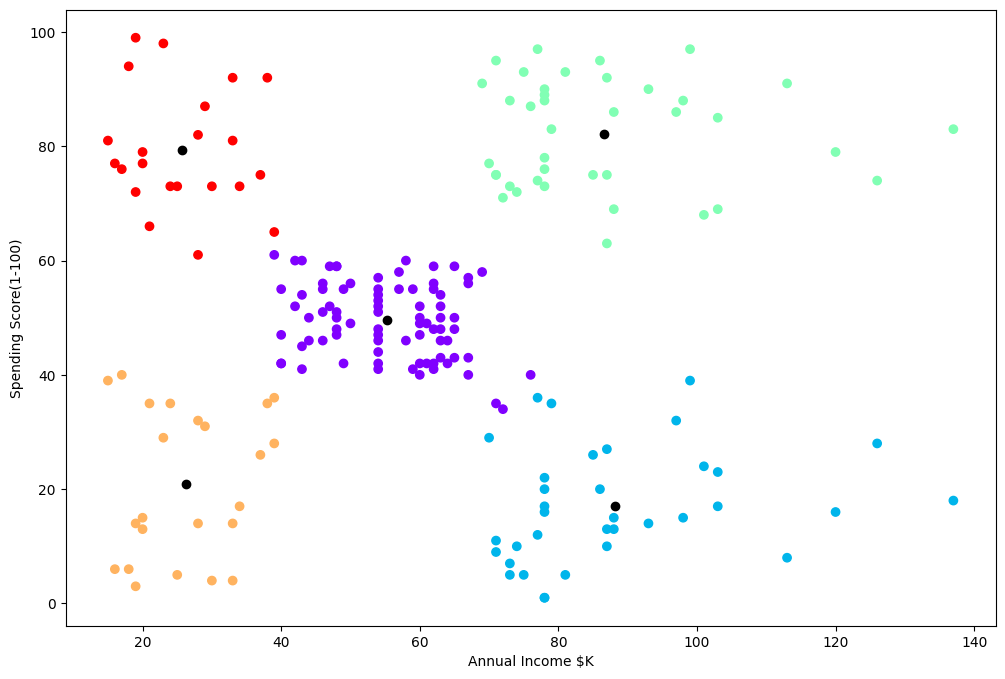

In [26]:
plt.figure(figsize=(12,8))
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel('Annual Income $K')
plt.ylabel('Spending Score(1-100)')
plt.show()

**Kesimpulan**

Dari hasil K-Means diatas, dapat disimpulkan bahwa pengelompokan pelanggan berdasarkan Annual Income dan Spending scorenya terdapat 5 kelompok. Masing-masing kelompok memiliki karakteristik masing-masing yang dapat dilihat dengan menghubungkan grafik diatas.